Structure des données:
   Labels                                               Text  \
0       1  Says the Annies List political group supports ...   
1       2  When did the decline of coal start? It started...   
2       3  Hillary Clinton agrees with John McCain "by vo...   
3       1  Health care reform legislation is likely to ma...   
4       2  The economic turnaround started at the end of ...   

                             Text_Tag  
0                            abortion  
1  energy,history,job-accomplishments  
2                      foreign-policy  
3                         health-care  
4                        economy,jobs  

Informations sur le dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    10240 non-null  int64 
 1   Text      10240 non-null  object
 2   Text_Tag  10238 non-null  object
dtypes: int64(1), obje

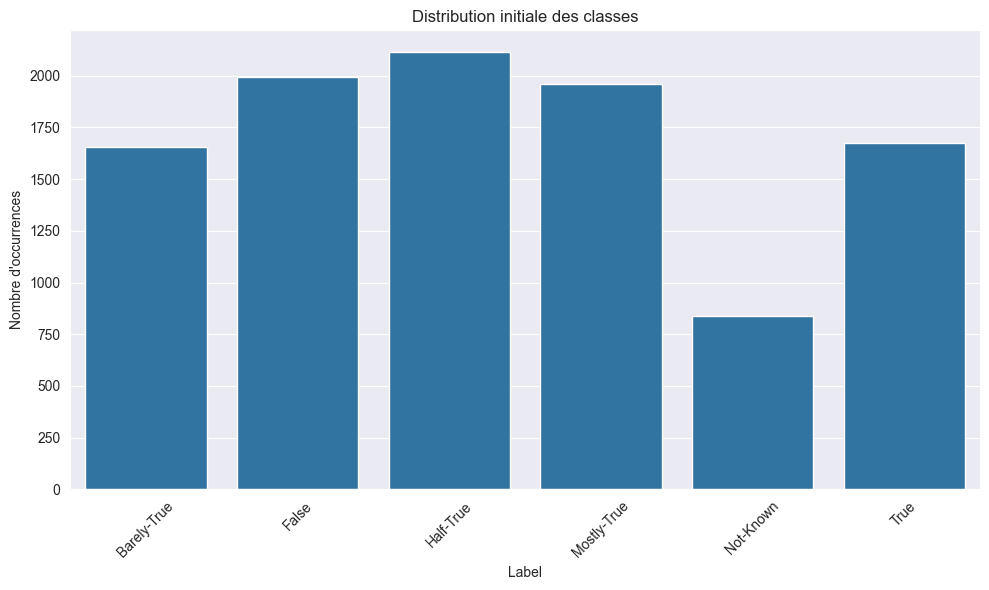


Nous conservons les classes extrêmes: ['False', 'True']

Nombre d'exemples dans le nouveau dataset: 3671

Nombre d'occurrences par classe dans le nouveau dataset:
Labels
1    1995
5    1676
Name: count, dtype: int64


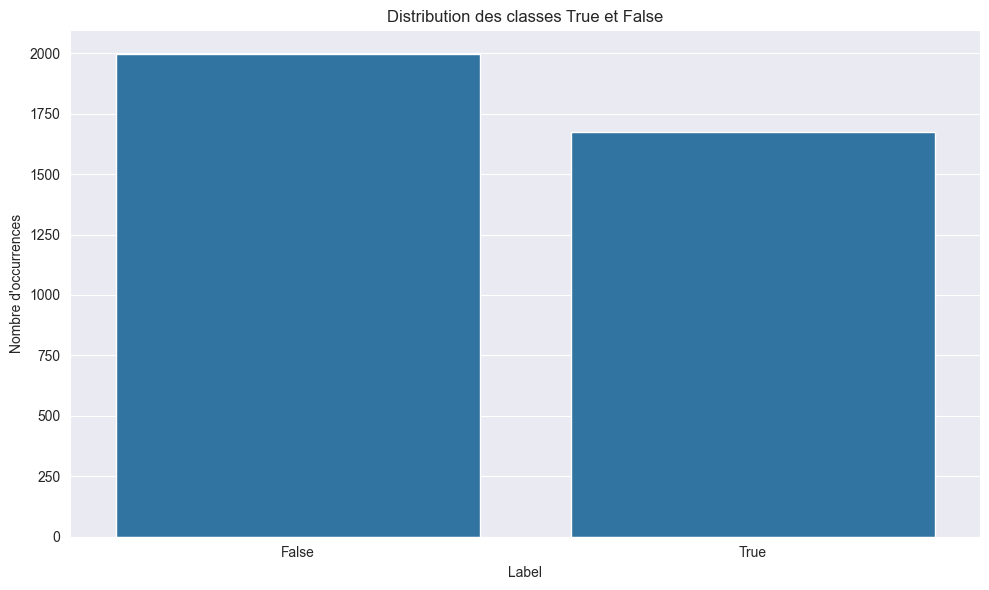


Le nouveau dataset a été sauvegardé dans 'train_true_false.csv'


C:\Users\User\AppData\Local\Temp\ipykernel_19708\4031179240.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['text_length'] = df_filtered['Text'].str.len()


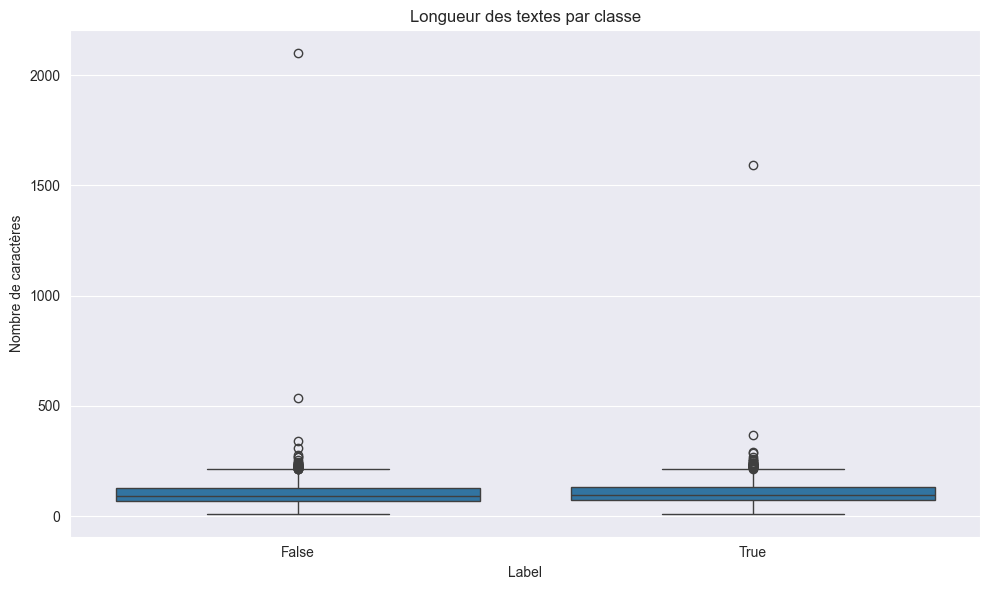


Top 10 des tags pour la classe False:
health-care             261
economy                 191
taxes                   188
federal-budget          148
elections               135
jobs                    134
state-budget            133
candidates-biography    129
education               111
immigration             110
Name: count, dtype: int64


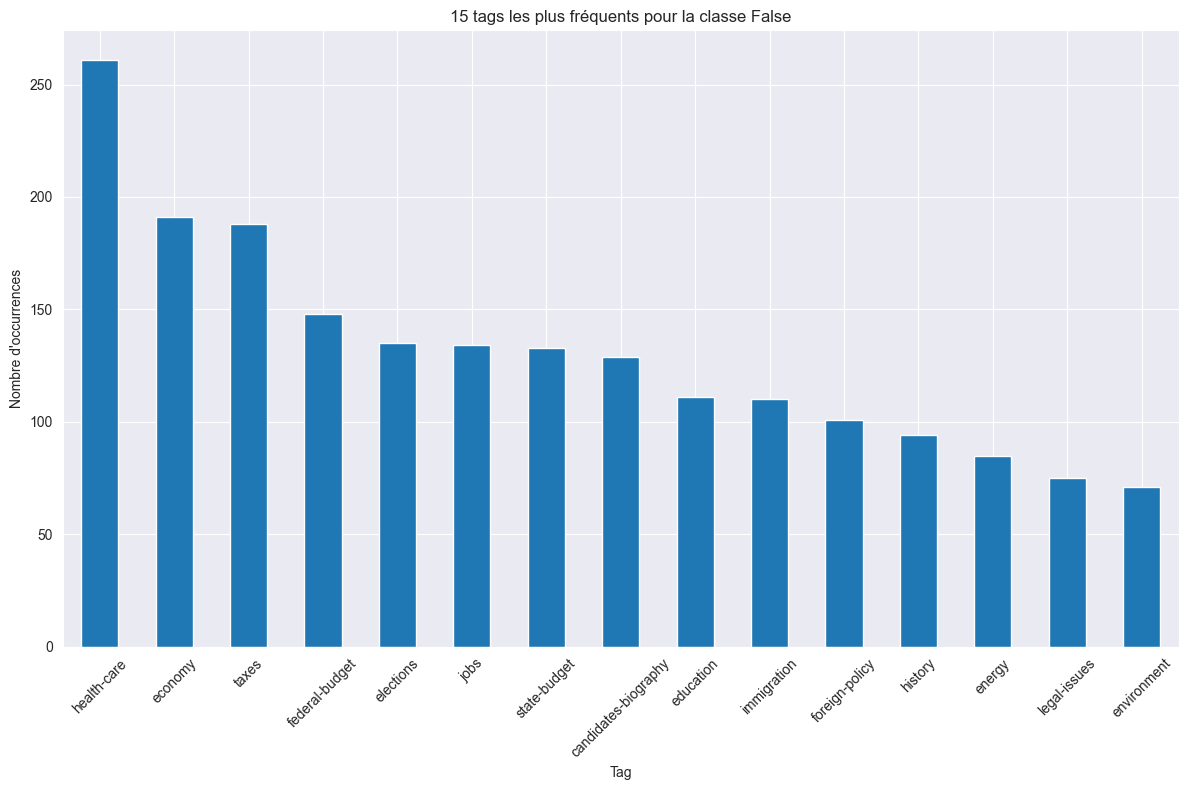


Top 10 des tags pour la classe True:
economy                 206
taxes                   141
health-care             136
education               116
federal-budget          116
elections               115
jobs                    114
state-budget            112
candidates-biography     97
crime                    76
Name: count, dtype: int64


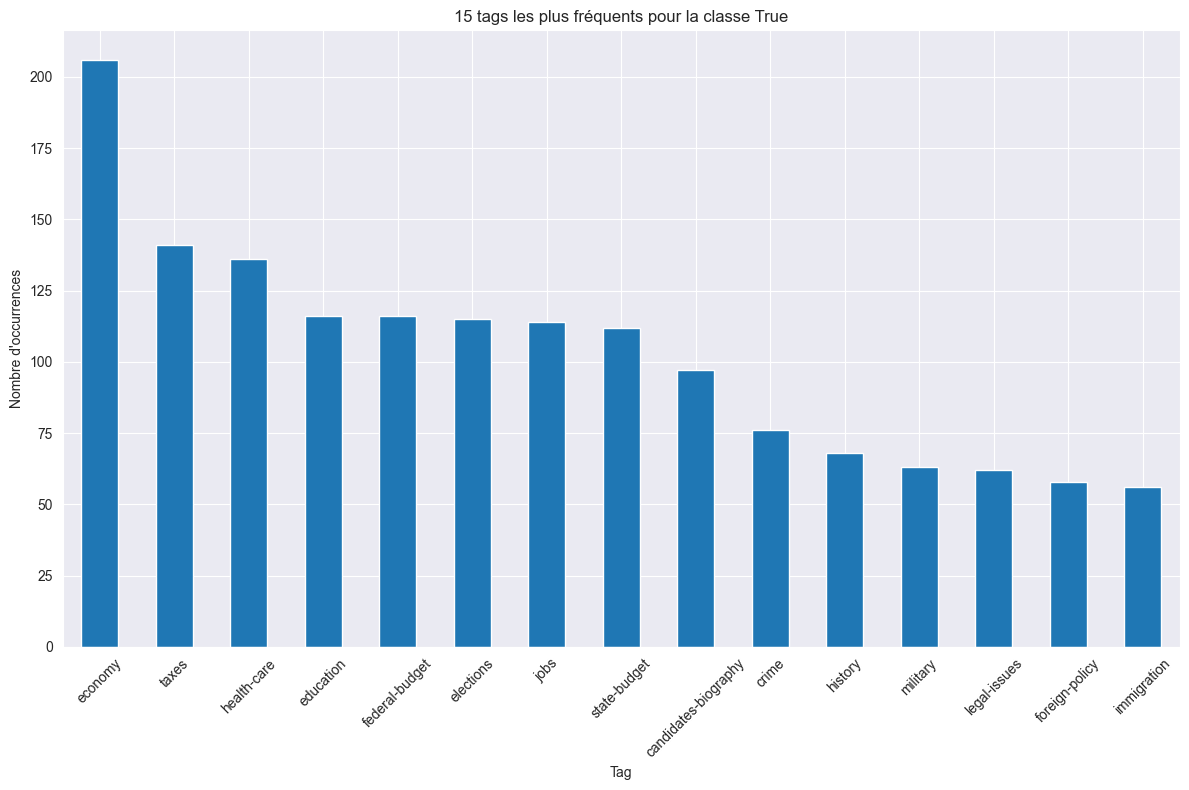

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
df = pd.read_csv('data_jour_4/train.csv')

# Affichage des premières lignes pour vérifier la structure
print("Structure des données:")
print(df.head())

# Vérification des informations sur le dataframe
print("\nInformations sur le dataframe:")
print(df.info())

# Création d'un dictionnaire pour mapper les valeurs numériques aux labels textuels
label_mapping = {
    0: 'Barely-True',
    1: 'False',
    2: 'Half-True',
    3: 'Mostly-True',
    4: 'Not-Known',
    5: 'True'
}

# Ajout d'une colonne avec les labels textuels si nécessaire
if df['Labels'].dtype == 'int64' or df['Labels'].dtype == 'int32':
    df['Label_Text'] = df['Labels'].map(label_mapping)
    print("\nAjout de la colonne Label_Text effectué.")

# Comptage des occurrences pour chaque classe
class_counts = df['Labels'].value_counts()
print("\nNombre d'occurrences par classe:")
print(class_counts)

# Visualisation de la distribution des classes initiales
plt.figure(figsize=(10, 6))
sns.countplot(x='Labels', data=df)
plt.title('Distribution initiale des classes')
plt.xlabel('Label')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(range(6), [label_mapping[i] for i in range(6)], rotation=45)
plt.tight_layout()
plt.savefig('distribution_classes_initiale.png')
plt.show()

# Sélection des classes extrêmes : True (5) et False (1)
extreme_classes = [1, 5]  # False et True
print(f"\nNous conservons les classes extrêmes: {[label_mapping[i] for i in extreme_classes]}")

# Création d'un nouveau dataframe avec uniquement les classes True et False
df_filtered = df[df['Labels'].isin(extreme_classes)]
print(f"\nNombre d'exemples dans le nouveau dataset: {len(df_filtered)}")

# Vérification de la distribution des classes dans le nouveau dataframe
new_class_counts = df_filtered['Labels'].value_counts()
print("\nNombre d'occurrences par classe dans le nouveau dataset:")
print(new_class_counts)

# Visualisation de la distribution des classes dans le nouveau dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='Labels', data=df_filtered)
plt.title('Distribution des classes True et False')
plt.xlabel('Label')
plt.ylabel('Nombre d\'occurrences')
plt.xticks([0, 1], [label_mapping[extreme_classes[0]], label_mapping[extreme_classes[1]]])
plt.tight_layout()
plt.savefig('distribution_classes_true_false.png')
plt.show()

# Sauvegarde du nouveau dataframe dans un fichier CSV
df_filtered.to_csv('train_true_false.csv', index=False)
print("\nLe nouveau dataset a été sauvegardé dans 'train_true_false.csv'")

# Analyse des longueurs de texte par classe
df_filtered['text_length'] = df_filtered['Text'].str.len()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Labels', y='text_length', data=df_filtered)
plt.title('Longueur des textes par classe')
plt.xlabel('Label')
plt.ylabel('Nombre de caractères')
plt.xticks([0, 1], [label_mapping[extreme_classes[0]], label_mapping[extreme_classes[1]]])
plt.tight_layout()
plt.savefig('longueur_texte_par_classe.png')
plt.show()

# Exploration des tags textuels pour les classes True et False
if 'Text_Tag' in df.columns:
    # Extraction des tags uniques pour chaque classe extrême
    for label in extreme_classes:
        class_df = df_filtered[df_filtered['Labels'] == label]
        class_tags = []
        for tags in class_df['Text_Tag'].str.split(','):
            if isinstance(tags, list):
                class_tags.extend([tag.strip() for tag in tags if tag.strip()])

        class_tag_counts = pd.Series(class_tags).value_counts()
        print(f"\nTop 10 des tags pour la classe {label_mapping[label]}:")
        print(class_tag_counts.head(10))

        # Visualisation des tags les plus fréquents pour cette classe
        plt.figure(figsize=(12, 8))
        class_tag_counts.head(15).plot(kind='bar')
        plt.title(f'15 tags les plus fréquents pour la classe {label_mapping[label]}')
        plt.xlabel('Tag')
        plt.ylabel('Nombre d\'occurrences')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'distribution_tags_{label_mapping[label]}.png')
        plt.show()

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Télécharger les ressources nécessaires de nltk (si pas déjà fait)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Fonction de prétraitement des textes
def preprocess_text(text):
    # Convertir en minuscule
    text = text.lower()

    # Tokenisation
    tokens = word_tokenize(text)

    # Suppression de la ponctuation et des stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstituer le texte
    return " ".join(lemmatized_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Étude exploratoire des données

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Statistiques sur les textes:
        word_count  sentence_count  avg_word_length  avg_sentence_length
count  3671.000000     3671.000000      3671.000000          3671.000000
mean     19.547262        1.150640         5.062173            17.689193
std      10.958897        0.514026         0.708390             7.477196
min       2.000000        1.000000         3.000000             2.000000
25%      13.000000        1.000000         4.581140            12.000000
50%      18.000000        1.000000         5.000000            17.000000
75%      24.000000        1.000000         5.461538            22.000000
max     356.000000       11.000000         9.166667            51.000000


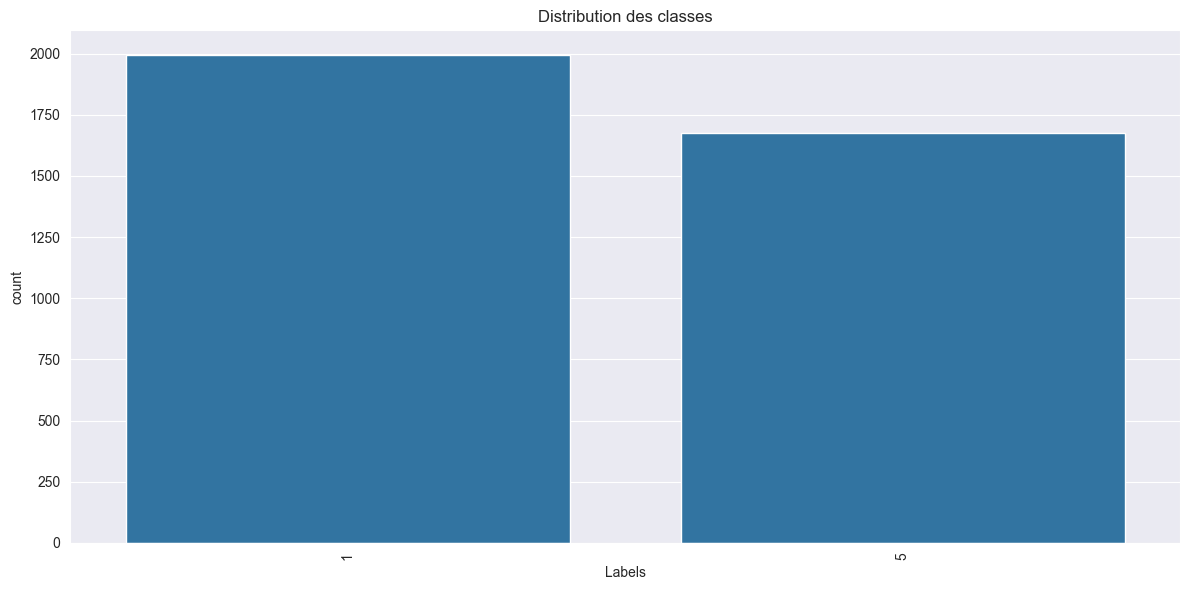

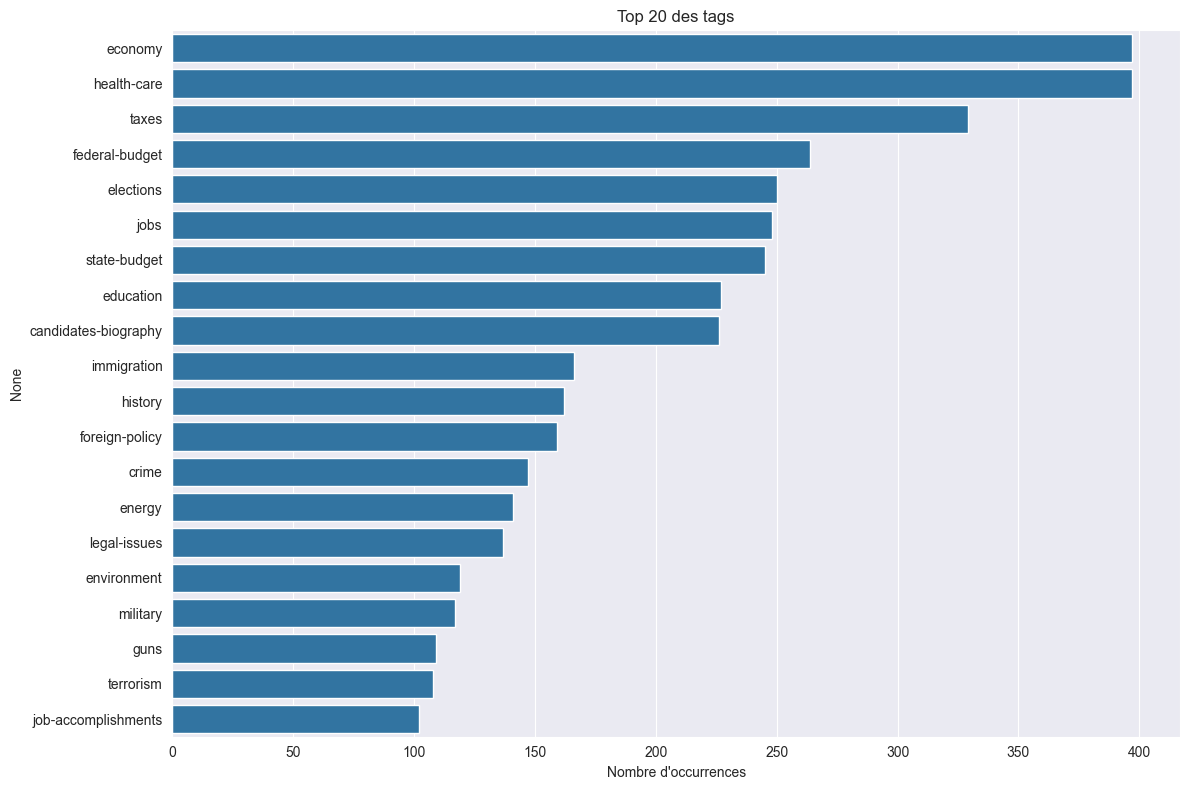

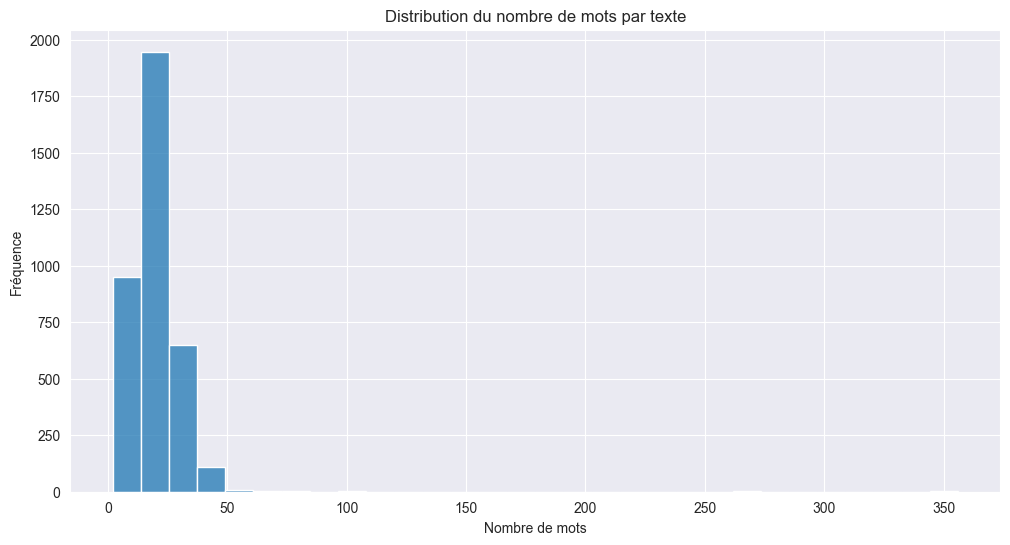

In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
import numpy as np

train_df = pd.read_csv('train_true_false.csv')

# Ajouter des caractéristiques textuelles
train_df['word_count'] = train_df['Text'].apply(lambda x: len(word_tokenize(str(x))))
train_df['sentence_count'] = train_df['Text'].apply(lambda x: len(sent_tokenize(str(x))))
train_df['avg_word_length'] = train_df['Text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if len(str(x).split()) > 0 else 0)
train_df['avg_sentence_length'] = train_df['word_count'] / train_df['sentence_count']

# Statistiques descriptives
print("\nStatistiques sur les textes:")
print(train_df[['word_count', 'sentence_count', 'avg_word_length', 'avg_sentence_length']].describe())

# Distribution des classes (si disponible)
if 'Labels' in train_df.columns and train_df['Labels'].notna().any():
    plt.figure(figsize=(12, 6))
    sns.countplot(data=train_df, x='Labels')
    plt.title('Distribution des classes')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Distribution des tags
all_tags = []
for tags in train_df['Text_Tag']:
    if isinstance(tags, str):
        all_tags.extend([tag.strip() for tag in tags.split(',')])

tag_counts = pd.Series(all_tags).value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=tag_counts.values[:20], y=tag_counts.index[:20])
plt.title('Top 20 des tags')
plt.xlabel('Nombre d\'occurrences')
plt.tight_layout()
plt.show()

# Longueur des textes
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='word_count', bins=30)
plt.title('Distribution du nombre de mots par texte')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.show()

Prétraitement et nettoyage des données

In [4]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Convertir en minuscules
    text = str(text).lower()

    # Supprimer la ponctuation
    text = re.sub(f'[{string.punctuation}]', ' ', text)

    # Supprimer les nombres
    text = re.sub(r'\d+', '', text)

    # Supprimer les espaces multiples et les caractères non ASCII
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    return text.strip()

# Appliquer le nettoyage
train_df['cleaned_text'] = train_df['Text'].apply(clean_text)

# Tokenization
train_df['tokens'] = train_df['cleaned_text'].apply(word_tokenize)

# Suppression des stopwords
stop_words = set(stopwords.words('english'))
train_df['tokens_no_stop'] = train_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming ou Lemmatization (choisir l'un des deux)
stemmer = PorterStemmer()
train_df['stemmed_tokens'] = train_df['tokens_no_stop'].apply(lambda x: [stemmer.stem(word) for word in x])

lemmatizer = WordNetLemmatizer()
train_df['lemmatized_tokens'] = train_df['tokens_no_stop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Reconstituer les textes nettoyés
train_df['stemmed_text'] = train_df['stemmed_tokens'].apply(lambda x: ' '.join(x))
train_df['lemmatized_text'] = train_df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

# Afficher un exemple avant/après
print("\nExemple de prétraitement:")
print("Original:", train_df['Text'].iloc[0])
print("Nettoyé:", train_df['cleaned_text'].iloc[0])
print("Stemming:", train_df['stemmed_text'].iloc[0])
print("Lemmatization:", train_df['lemmatized_text'].iloc[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Exemple de prétraitement:
Original: Says the Annies List political group supports third-trimester abortions on demand.
Nettoyé: says the annies list political group supports third trimester abortions on demand
Stemming: say anni list polit group support third trimest abort demand
Lemmatization: say annies list political group support third trimester abortion demand


Analyse de sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


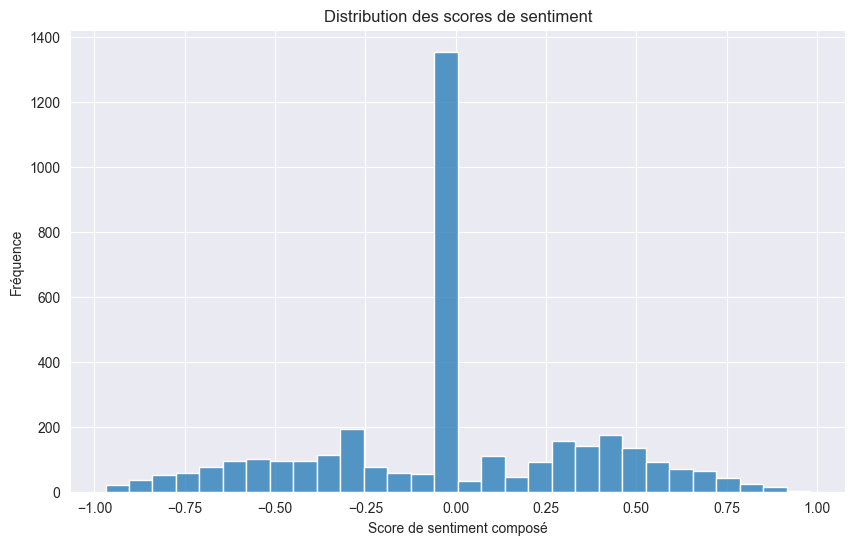

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Calculer les scores de sentiment
train_df['sentiment_scores'] = train_df['cleaned_text'].apply(lambda x: sia.polarity_scores(x))
train_df['sentiment_neg'] = train_df['sentiment_scores'].apply(lambda x: x['neg'])
train_df['sentiment_neu'] = train_df['sentiment_scores'].apply(lambda x: x['neu'])
train_df['sentiment_pos'] = train_df['sentiment_scores'].apply(lambda x: x['pos'])
train_df['sentiment_compound'] = train_df['sentiment_scores'].apply(lambda x: x['compound'])

# Visualiser la distribution des sentiments
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='sentiment_compound', bins=30)
plt.title('Distribution des scores de sentiment')
plt.xlabel('Score de sentiment composé')
plt.ylabel('Fréquence')
plt.show()

 Regroupement des classes en fonction des Text_Tag

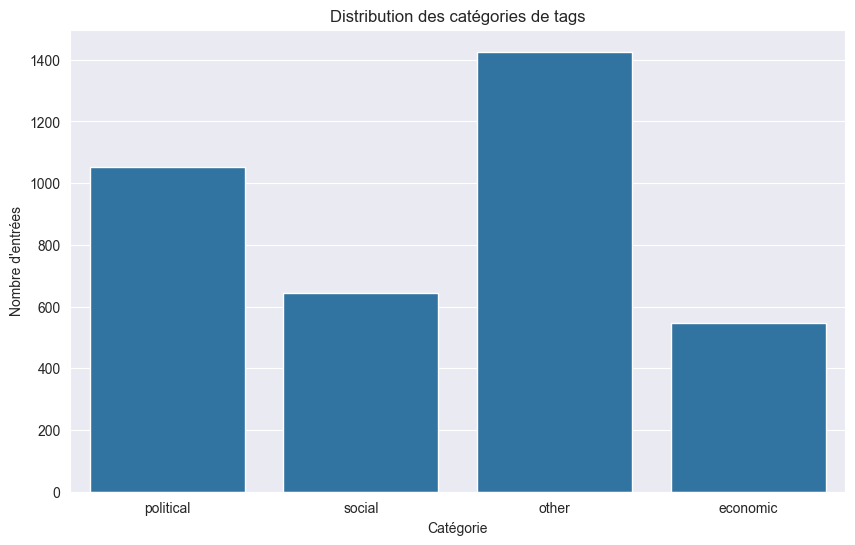

In [6]:
# Extraire les tags uniques et créer des groupes plus larges
def categorize_tag(tag_list):
    political_tags = ['immigration', 'abortion', 'guns', 'foreign-policy', 'taxes', 'federal-budget']
    economic_tags = ['jobs', 'economy', 'energy', 'business', 'trade']
    social_tags = ['education', 'health-care', 'environment', 'crime']

    # Convertir en liste si c'est une chaîne
    if isinstance(tag_list, str):
        tag_list = [t.strip() for t in tag_list.split(',')]
    elif pd.isna(tag_list):
        tag_list = []

    # Vérifier les catégories
    if any(tag in political_tags for tag in tag_list):
        return 'political'
    elif any(tag in economic_tags for tag in tag_list):
        return 'economic'
    elif any(tag in social_tags for tag in tag_list):
        return 'social'
    else:
        return 'other'

# Appliquer la catégorisation
train_df['tag_category'] = train_df['Text_Tag'].apply(categorize_tag)

# Visualiser la distribution des catégories
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='tag_category')
plt.title('Distribution des catégories de tags')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'entrées')
plt.show()

Vectorisation et embeddings

In [7]:
# TF-IDF pour la baseline
# !{sys.executable} -m pip install spacy
from sklearn.feature_extraction.text import TfidfVectorizer
# import spacy

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(train_df['lemmatized_text'])

# GloVe embeddings
import gensim.downloader as api

# Télécharger différents modèles d'embeddings
print("Téléchargement du modèle GloVe...")
glove_model = api.load("glove-wiki-gigaword-100")
print("Téléchargement terminé.")

def get_glove_embedding(tokens, model, dim=100):
    embeddings = []
    for token in tokens:
        if token in model:
            embeddings.append(model[token])
    if embeddings:
        return np.mean(embeddings, axis=0)
    return np.zeros(dim)

# Appliquer les embeddings GloVe
train_df['glove_embeddings'] = train_df['lemmatized_tokens'].apply(lambda x: get_glove_embedding(x, glove_model))

# Créer un DataFrame avec les embeddings pour la modélisation ultérieure
glove_features = np.array(train_df['glove_embeddings'].tolist())
print("Dimensions des embeddings GloVe:", glove_features.shape)

# SpaCy embeddings (si disponible)
try:
    print("Téléchargement du modèle SpaCy...")
    nlp = spacy.load("en_core_web_md")

    def get_spacy_embedding(text):
        doc = nlp(text)
        return doc.vector

    train_df['spacy_embeddings'] = train_df['cleaned_text'].apply(get_spacy_embedding)
    spacy_features = np.array(train_df['spacy_embeddings'].tolist())
    print("Dimensions des embeddings SpaCy:", spacy_features.shape)
except:
    print("SpaCy ou son modèle n'est pas disponible. Ignoré.")

Téléchargement du modèle GloVe...
Téléchargement terminé.
Dimensions des embeddings GloVe: (3671, 100)
Téléchargement du modèle SpaCy...
SpaCy ou son modèle n'est pas disponible. Ignoré.


Classification du degré de désinformation

Pipeline LSTM

In [8]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle
import os

# ---------- 1. Préparation des données ----------
# Garder seulement les labels 1 (False) et 5 (True), puis remapper
train_df = train_df[train_df['Labels'].isin([1, 5])].copy()
train_df['label_binary'] = train_df['Labels'].map({1: 0, 5: 1})

# ---------- 2. Tokenisation ----------
MAX_NUM_WORDS = 10000
MAX_SEQ_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['lemmatized_text'])

sequences = tokenizer.texts_to_sequences(train_df['lemmatized_text'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH, padding='post')

# ---------- 3. Embedding Matrix (GloVe 100d) ----------
EMBEDDING_DIM = 100
embedding_index = {}

for word, i in tokenizer.word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = glove_model[word] if word in glove_model else None
    if embedding_vector is not None:
        embedding_index[word] = embedding_vector

embedding_matrix = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    if i < MAX_NUM_WORDS:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# ---------- 4. Train/test split ----------
X = padded_sequences
y = train_df['label_binary'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

# ---------- 5. LSTM Model ----------
model = Sequential([
    Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQ_LENGTH, trainable=False),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ---------- 6. Entraînement ----------
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=12,
    batch_size=32,
    callbacks=[early_stop]
)

# ---------- 7. Sauvegarde ----------
# Créer un dossier
os.makedirs("saved_model", exist_ok=True)

# Modèle
model.save("saved_model/lstm_disinfo_model.h5")

# Tokenizer
with open("saved_model/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Données prétraitées (facultatif)
np.save("saved_model/X_val.npy", X_val)
np.save("saved_model/y_val.npy", y_val)

Epoch 1/12


C:\Users\User\Code\reseaux_neuronaux\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.4617 - loss: 0.6936 - val_accuracy: 0.5436 - val_loss: 0.6925
Epoch 2/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.5086 - loss: 0.6929 - val_accuracy: 0.5436 - val_loss: 0.6912
Epoch 3/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.5279 - loss: 0.6915 - val_accuracy: 0.5436 - val_loss: 0.6896
Epoch 4/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.5070 - loss: 0.6957 - val_accuracy: 0.5436 - val_loss: 0.6896
Epoch 5/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.5402 - loss: 0.6899 - val_accuracy: 0.5436 - val_loss: 0.6894
Epoch 6/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.5327 - loss: 0.6922 - val_accuracy: 0.5436 - val_loss: 0.6896
Epoch 7/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.5325 - loss: 0.6925 - val_accuracy: 0.5436 - val_loss: 0.6895
Epoch 8/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.5549 - loss: 0.6898 - val_accuracy: 0.5436 - val_

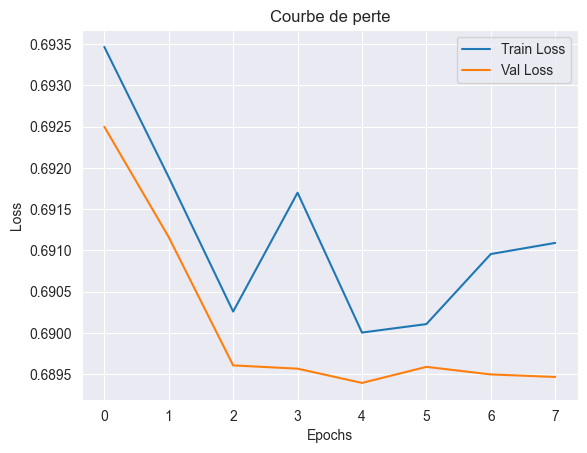

In [9]:
import matplotlib.pyplot as plt

# Visualisation de la courbe de perte pour l'entraînement et la validation
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Courbe de perte')
plt.show()

In [10]:
# Importations nécessaires
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Chargement des données de test
test_df = pd.read_csv("data_jour_4/test.csv")

# Initialisation des outils de prétraitement
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Fonction de nettoyage (adaptée de la fonction que tu as utilisée)
def clean_text(text):
    # Nettoyage basique (retirer les caractères spéciaux, les chiffres, etc.)
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())  # Garde seulement les lettres
    return text

# Appliquer le nettoyage et prétraitement
test_df['cleaned_text'] = test_df['Text'].apply(clean_text)
test_df['tokens'] = test_df['cleaned_text'].apply(word_tokenize)
test_df['tokens_no_stop'] = test_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
test_df['lemmatized_tokens'] = test_df['tokens_no_stop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Créer la colonne 'lemmatized_text' à partir des tokens lemmatisés
test_df['lemmatized_text'] = test_df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

# Vérifier que la colonne 'lemmatized_text' existe maintenant
print(test_df.columns)


Index(['Text', 'Text_Tag', 'cleaned_text', 'tokens', 'tokens_no_stop',
       'lemmatized_tokens', 'lemmatized_text'],
      dtype='object')


In [11]:
from tensorflow.keras.models import load_model
import pickle

# Charger modèle et tokenizer
model = load_model("saved_model/lstm_disinfo_model.h5")
with open("saved_model/tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

sequences = tokenizer.texts_to_sequences(test_df['lemmatized_text'])
X_test = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH)

preds = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [12]:
# Afficher les probabilités pour chaque classe
print("Probabilités pour chaque classe :")
print(preds)

# Optionnel : Ajouter les probabilités au DataFrame
# Pour afficher les probabilités de chaque classe dans un DataFrame
class_probabilities_df = pd.DataFrame(preds, columns=[f'class_{i}' for i in range(preds.shape[1])])

# Ajouter les probabilités dans le DataFrame final
test_df = pd.concat([test_df, class_probabilities_df], axis=1)

# Afficher les 5 premières lignes avec les probabilités
print(test_df.head())

Probabilités pour chaque classe :
[[0.55334187]
 [0.46563667]
 [0.49678355]
 ...
 [0.597957  ]
 [0.5543861 ]
 [0.44204658]]
                                                Text  \
0  Building a wall on the U.S.-Mexico border will...   
1  Wisconsin is on pace to double the number of l...   
2  Says John McCain has done nothing to help the ...   
3  Suzanne Bonamici supports a plan that will cut...   
4  When asked by a reporter whether hes at the ce...   

                                            Text_Tag  \
0                                        immigration   
1                                               jobs   
2                    military,veterans,voting-record   
3  medicare,message-machine-2012,campaign-adverti...   
4  campaign-finance,legal-issues,campaign-adverti...   

                                        cleaned_text  \
0  building a wall on the usmexico border will ta...   
1  wisconsin is on pace to double the number of l...   
2  says john mccain has done nothi

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy: 0.4781


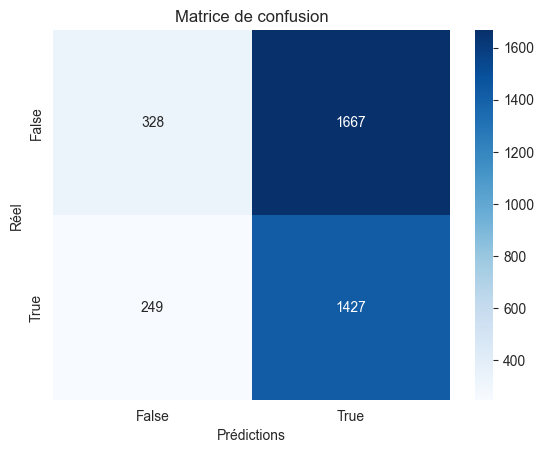

Rapport de classification :
              precision    recall  f1-score   support

           0       0.57      0.16      0.26      1995
           1       0.46      0.85      0.60      1676

    accuracy                           0.48      3671
   macro avg       0.51      0.51      0.43      3671
weighted avg       0.52      0.48      0.41      3671



In [13]:
train_df_filtered = train_df[train_df['Labels'].isin([1, 5])].copy()

# Remapper les labels (1 -> 0, 5 -> 1)
train_df_filtered['label_binary'] = train_df_filtered['Labels'].map({1: 0, 5: 1})

train_df_filtered['lemmatized_text'] = train_df_filtered['Text'].apply(preprocess_text)

# Tokenisation
sequences = tokenizer.texts_to_sequences(train_df_filtered['lemmatized_text'])
X_filtered = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH)

predictions = model.predict(X_filtered)

# Convertir les prédictions en labels binaires (True/False)
predicted_labels = (predictions > 0.5).astype(int)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Comparer les prédictions avec les labels réels
y_true = train_df_filtered['label_binary']

# Calcul de la précision
accuracy = accuracy_score(y_true, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_true, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_true, predicted_labels))

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np

# Tokenisation
MAX_NUM_WORDS = 10000
MAX_SEQ_LENGTH = 100
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['lemmatized_text'])

sequences = tokenizer.texts_to_sequences(train_df['lemmatized_text'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH, padding='post')

# Extraction des features
X_sentiment = train_df[['sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound']].values
X_tag_category = pd.get_dummies(train_df['tag_category']).values  # Conversion des catégories en one-hot

# Fusionner les caractéristiques
X_combined = np.concatenate([padded_sequences, X_sentiment, X_tag_category], axis=1)

# Labels
y = train_df['label_binary'].values

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X_combined, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Concatenate, Input
from tensorflow.keras import Model

# Taille de l'embedding GloVe
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))

# Charger le modèle GloVe et construire l'index
for word, i in tokenizer.word_index.items():
    if i < MAX_NUM_WORDS:
        embedding_vector = glove_model[word] if word in glove_model else None
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Modèle LSTM hybride
input_text = Input(shape=(MAX_SEQ_LENGTH,))
embedding_layer = Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQ_LENGTH, trainable=False)(input_text)
lstm_layer = LSTM(64)(embedding_layer)

# Entrées supplémentaires (sentiment et tags)
input_sentiment = Input(shape=(4,))
input_tag = Input(shape=(len(train_df['tag_category'].unique()),))

# Fusionner les entrées
merged = Concatenate()([lstm_layer, input_sentiment, input_tag])

# Ajouter des couches denses
dense_layer = Dense(64, activation='relu')(merged)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Compiler le modèle
model = Model(inputs=[input_text, input_sentiment, input_tag], outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    [X_train[:, :MAX_SEQ_LENGTH], X_train[:, MAX_SEQ_LENGTH:MAX_SEQ_LENGTH+4], X_train[:, MAX_SEQ_LENGTH+4:]],
    y_train,
    validation_data=([X_val[:, :MAX_SEQ_LENGTH], X_val[:, MAX_SEQ_LENGTH:MAX_SEQ_LENGTH+4], X_val[:, MAX_SEQ_LENGTH+4:]], y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20


C:\Users\User\Code\reseaux_neuronaux\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5054 - loss: 0.6980 - val_accuracy: 0.5429 - val_loss: 0.6896
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5415 - loss: 0.6894 - val_accuracy: 0.5429 - val_loss: 0.6890
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5304 - loss: 0.6902 - val_accuracy: 0.5429 - val_loss: 0.6893
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5422 - loss: 0.6889 - val_accuracy: 0.5293 - val_loss: 0.6894
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5506 - loss: 0.6853 - val_accuracy: 0.5415 - val_loss: 0.6893
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5438 - loss: 0.6853 - val_accuracy: 0.5429 - val_loss: 0.6890
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5484 - loss: 0.6874 - val_accuracy: 0.5361 - val_loss: 0.6894
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5575 - loss: 0.6851 - val_accuracy: 0.5320 - val_loss: 0.

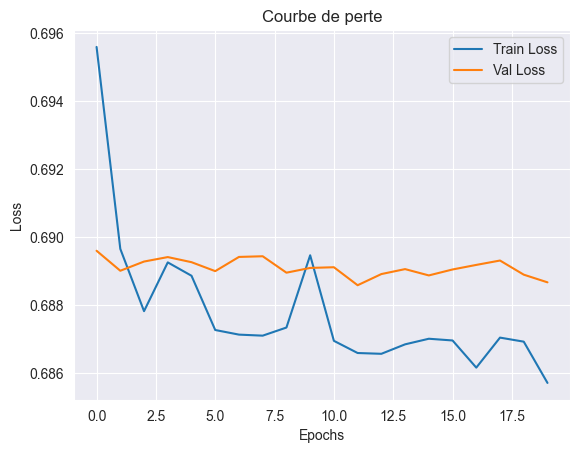

In [16]:
import matplotlib.pyplot as plt

# Visualisation de la courbe de perte pour l'entraînement et la validation
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Courbe de perte')
plt.show()

In [17]:
val_loss, val_accuracy = model.evaluate(
    [X_val[:, :MAX_SEQ_LENGTH], X_val[:, MAX_SEQ_LENGTH:MAX_SEQ_LENGTH+4], X_val[:, MAX_SEQ_LENGTH+4:]],
    y_val
)

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5452 - loss: 0.6867
Validation Loss: 0.688663125038147
Validation Accuracy: 0.5442177057266235


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Appliquer PCA sur les embeddings et autres features
X_combined = np.concatenate([padded_sequences, X_sentiment, X_tag_category], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Réduction de la dimensionnalité avec PCA
pca = PCA(n_components=50)  # Choisir le nombre de composants principaux
X_pca = pca.fit_transform(X_scaled)

# Diviser les données entre train et test comme d'habitude
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialiser le modèle RandomForest
rf = RandomForestClassifier()

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Utiliser le meilleur modèle
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Meilleurs hyperparamètres :  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Créer le modèle RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédictions sur le jeu de validation
y_pred = rf_model.predict(X_val)

# Afficher le rapport de classification
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.63      0.58       399
           1       0.45      0.36      0.40       336

    accuracy                           0.51       735
   macro avg       0.49      0.49      0.49       735
weighted avg       0.50      0.51      0.50       735



In [21]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Créer le modèle XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Prédictions sur le jeu de validation
y_pred = xgb_model.predict(X_val)

# Afficher le rapport de classification
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       399
           1       0.48      0.46      0.47       336

    accuracy                           0.53       735
   macro avg       0.52      0.52      0.52       735
weighted avg       0.52      0.53      0.52       735



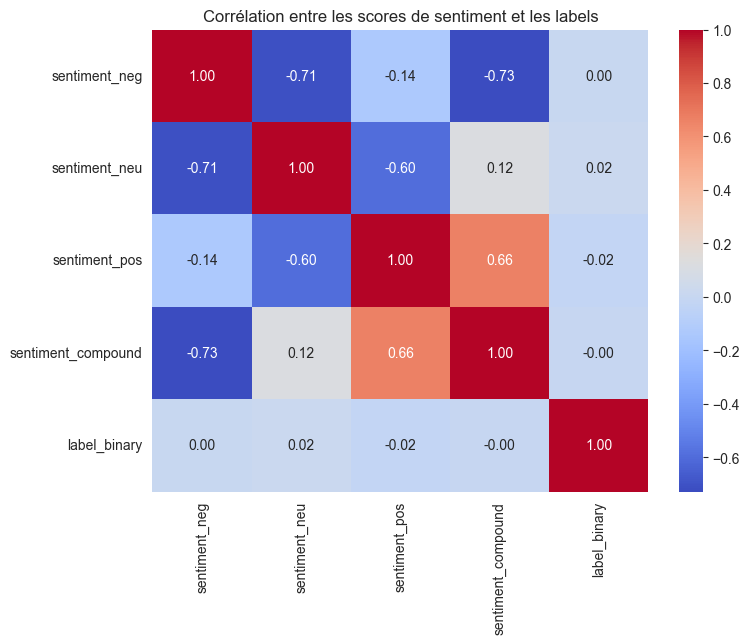

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcul de la corrélation entre les sentiments et les labels
sentiment_cols = ['sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound']

# Corrélation entre les scores de sentiment et les labels
corr = train_df[sentiment_cols + ['label_binary']].corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Corrélation entre les scores de sentiment et les labels")
plt.show()

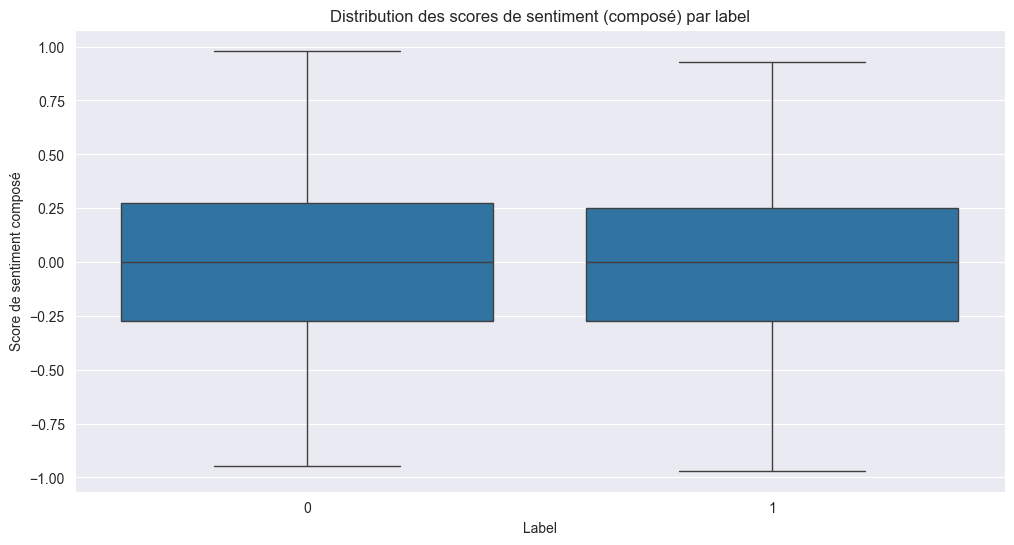

In [23]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='label_binary', y='sentiment_compound', data=train_df)
plt.title('Distribution des scores de sentiment (composé) par label')
plt.xlabel('Label')
plt.ylabel('Score de sentiment composé')
plt.show()

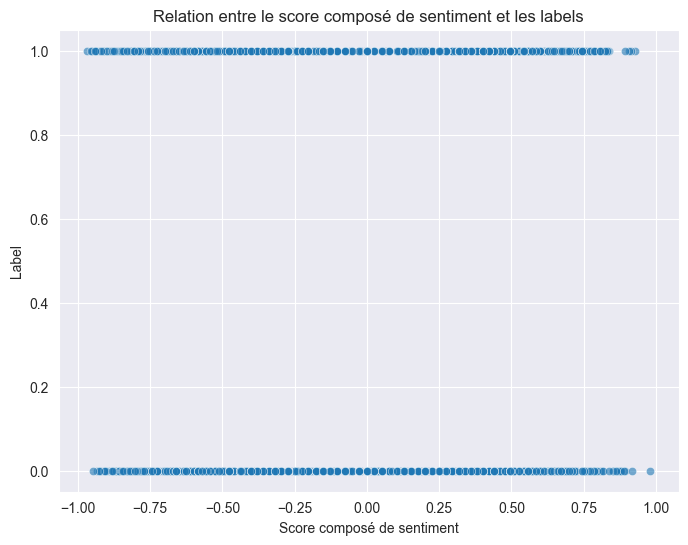

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiment_compound', y='label_binary', data=train_df, alpha=0.6)
plt.title('Relation entre le score composé de sentiment et les labels')
plt.xlabel('Score composé de sentiment')
plt.ylabel('Label')
plt.show()

In [25]:
correlation = train_df['sentiment_compound'].corr(train_df['label_binary'])
print(f'Corrélation de Pearson entre le score composé de sentiment et les labels : {correlation:.2f}')

Corrélation de Pearson entre le score composé de sentiment et les labels : -0.00


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Textes et labels binaires
X_text = train_df['lemmatized_text']
y = train_df['label_binary']

# 2. TF-IDF Vectorisation
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # unigrams + bigrams
X_tfidf = vectorizer.fit_transform(X_text)

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# 4. Modèle RandomForest (ou autre)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Prédictions
y_pred = model.predict(X_test)

# 6. Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66       399
           1       0.57      0.43      0.49       336

    accuracy                           0.59       735
   macro avg       0.59      0.58      0.57       735
weighted avg       0.59      0.59      0.58       735



In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# --- 1. TF-IDF vectorisation ---
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(train_df['lemmatized_text']).toarray()

# --- 2. Sentiment features ---
sentiment_features = train_df[['sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound']].values

# --- 3. One-hot encoding des catégories de tags ---
encoder = OneHotEncoder(sparse_output=False)
tag_features = encoder.fit_transform(train_df[['tag_category']])

# --- 4. Split ---
X1_train, X1_val, X2_train, X2_val, X3_train, X3_val, y_train, y_val = train_test_split(
    X_tfidf, sentiment_features, tag_features, train_df['label_binary'].values,
    test_size=0.9, random_state=42, stratify=train_df['label_binary']
)

# --- 5. Construction du modèle ---
input_text = Input(shape=(X1_train.shape[1],))
input_sentiment = Input(shape=(X2_train.shape[1],))
input_tags = Input(shape=(X3_train.shape[1],))

merged = Concatenate()([input_text, input_sentiment, input_tags])
dense1 = Dense(128, activation='relu')(merged)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation='sigmoid')(dropout)

model = Model(inputs=[input_text, input_sentiment, input_tags], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- 6. Entraînement ---
history = model.fit(
    [X1_train, X2_train, X3_train],
    y_train,
    validation_data=([X1_val, X2_val, X3_val], y_val),
    epochs=50,
    batch_size=32
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4768 - loss: 0.6951 - val_accuracy: 0.5390 - val_loss: 0.6917
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6430 - loss: 0.6798 - val_accuracy: 0.5445 - val_loss: 0.6894
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6688 - loss: 0.6624 - val_accuracy: 0.5469 - val_loss: 0.6880
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6881 - loss: 0.6422 - val_accuracy: 0.5421 - val_loss: 0.6867
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7925 - loss: 0.6129 - val_accuracy: 0.5457 - val_loss: 0.6853
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8663 - loss: 0.5805 - val_accuracy: 0.5554 - val_loss: 0.6841
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9348 - loss: 0.5421 - val_accuracy: 0.5560 - val_loss: 0.6830
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9453 - loss: 0.4991 - val_accuracy: 0.5542 - v

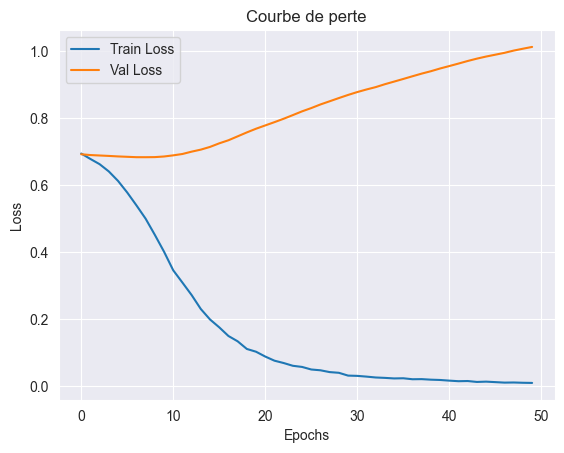

In [28]:
import matplotlib.pyplot as plt

# Visualisation de la courbe de perte pour l'entraînement et la validation
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Courbe de perte')
plt.show()

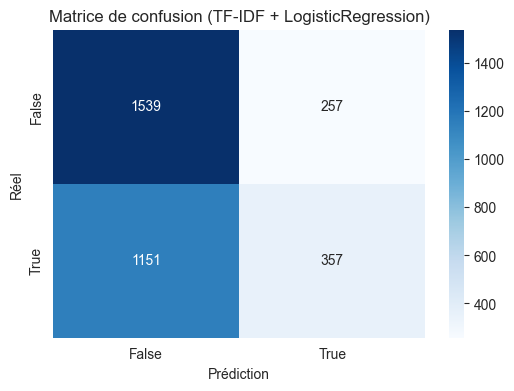

              precision    recall  f1-score   support

       False       0.57      0.86      0.69      1796
        True       0.58      0.24      0.34      1508

    accuracy                           0.57      3304
   macro avg       0.58      0.55      0.51      3304
weighted avg       0.58      0.57      0.53      3304



In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limiter le nombre de features si nécessaire
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(train_df['lemmatized_text'])  # Utilise bien le texte lemmatisé
y = train_df['label_binary']  # 0 pour False, 1 pour True
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.9, stratify=y, random_state=42)
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
cm = confusion_matrix(y_val, y_pred)

# Affichage
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion (TF-IDF + LogisticRegression)')
plt.show()

# Rapport détaillé
print(classification_report(y_val, y_pred, target_names=["False", "True"]))

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
train_df['sentiment'] = train_df['cleaned_text'].apply(lambda x: sia.polarity_scores(x))
train_df['sentiment_compound'] = train_df['sentiment'].apply(lambda x: x['compound'])
train_df['sentiment_neg'] = train_df['sentiment'].apply(lambda x: x['neg'])
train_df['sentiment_neu'] = train_df['sentiment'].apply(lambda x: x['neu'])
train_df['sentiment_pos'] = train_df['sentiment'].apply(lambda x: x['pos'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


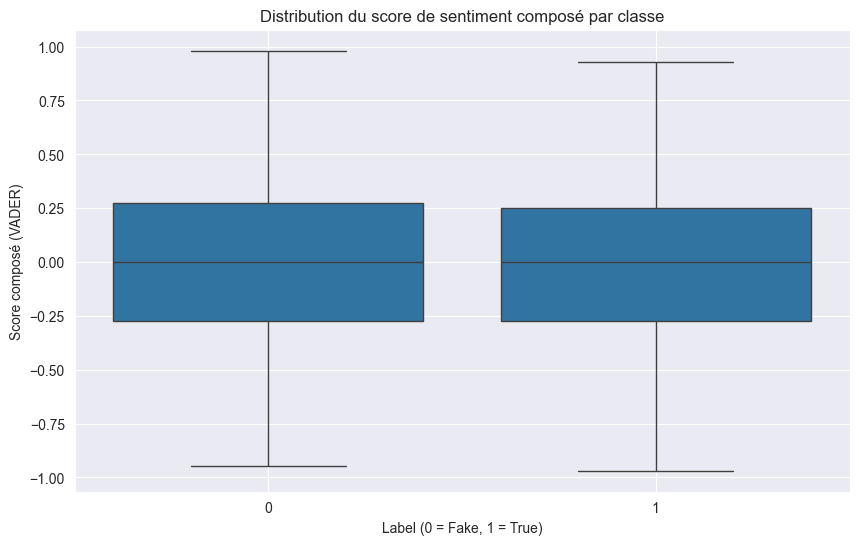

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher la distribution des scores composés par classe
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='label_binary', y='sentiment_compound')
plt.title('Distribution du score de sentiment composé par classe')
plt.xlabel('Label (0 = Fake, 1 = True)')
plt.ylabel('Score composé (VADER)')
plt.grid(True)
plt.show()

In [33]:
sentiment_means = train_df.groupby('label_binary')[['sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound']].mean()
print(sentiment_means)

              sentiment_neg  sentiment_neu  sentiment_pos  sentiment_compound
label_binary                                                                 
0                  0.076321       0.849237       0.074448           -0.006686
1                  0.076882       0.853681       0.069445           -0.009758


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Séparer les textes par label
fake_texts = train_df[train_df['label_binary'] == 0]['lemmatized_text']
true_texts = train_df[train_df['label_binary'] == 1]['lemmatized_text']

# Appliquer CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit et transformer les textes
fake_vectorized = vectorizer.fit_transform(fake_texts)
true_vectorized = vectorizer.fit_transform(true_texts)

# Obtenir les mots les plus fréquents dans chaque classe
fake_words = vectorizer.get_feature_names_out()
true_words = vectorizer.get_feature_names_out()

# Compter les occurrences de chaque mot dans chaque classe
fake_word_counts = fake_vectorized.toarray().sum(axis=0)
true_word_counts = true_vectorized.toarray().sum(axis=0)

# Créer un DataFrame pour visualiser
fake_df = pd.DataFrame(list(zip(fake_words, fake_word_counts)), columns=['Word', 'Count'])
true_df = pd.DataFrame(list(zip(true_words, true_word_counts)), columns=['Word', 'Count'])

# Trier pour voir les mots les plus fréquents
fake_df = fake_df.sort_values(by='Count', ascending=False)
true_df = true_df.sort_values(by='Count', ascending=False)

print("Top 10 mots dans les Fake News :")
print(fake_df.head(10))
print("\nTop 10 mots dans les Vraies News :")
print(true_df.head(10))

Top 10 mots dans les Fake News :
       Word  Count
15    state    495
16      tax    260
19     year    207
17    texas    181
11  percent    165
13     rate    153
14      say    151
6   million    141
7       new    128
3   federal    121

Top 10 mots dans les Vraies News :
        Word  Count
14       say    333
15     state    261
11   percent    244
19      year    223
16       tax    157
6    million     93
4     health     92
0   american     90
18      time     89
5        job     88


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Appliquer TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=20)

# Fit et transformer les textes
fake_vectorized_tfidf = vectorizer_tfidf.fit_transform(fake_texts)
true_vectorized_tfidf = vectorizer_tfidf.fit_transform(true_texts)

# Obtenir les mots les plus significatifs dans chaque classe
fake_tfidf_words = vectorizer_tfidf.get_feature_names_out()
true_tfidf_words = vectorizer_tfidf.get_feature_names_out()

# Obtenir les scores TF-IDF
fake_tfidf_scores = fake_vectorized_tfidf.toarray().sum(axis=0)
true_tfidf_scores = true_vectorized_tfidf.toarray().sum(axis=0)

# Créer un DataFrame pour visualiser
fake_tfidf_df = pd.DataFrame(list(zip(fake_tfidf_words, fake_tfidf_scores)), columns=['Word', 'TF-IDF'])
true_tfidf_df = pd.DataFrame(list(zip(true_tfidf_words, true_tfidf_scores)), columns=['Word', 'TF-IDF'])

# Trier pour voir les mots les plus significatifs
fake_tfidf_df = fake_tfidf_df.sort_values(by='TF-IDF', ascending=False)
true_tfidf_df = true_tfidf_df.sort_values(by='TF-IDF', ascending=False)

print("Top 10 mots dans les Fake News (TF-IDF) :")
print(fake_tfidf_df.head(10))
print("\nTop 10 mots dans les Vraies News (TF-IDF) :")
print(true_tfidf_df.head(10))

Top 10 mots dans les Fake News (TF-IDF) :
         Word      TF-IDF
15      state  315.401029
16        tax  169.877540
19       year  130.262274
17      texas  113.773310
11    percent  102.285142
13       rate   99.932829
14        say   93.784002
12  president   80.998420
7         new   78.586083
6     million   75.554790

Top 10 mots dans les Vraies News (TF-IDF) :
        Word      TF-IDF
14       say  227.067806
15     state  168.341165
19      year  144.450426
11   percent  135.432179
16       tax   88.741530
0   american   64.072256
2    country   63.756401
18      time   63.634838
6    million   61.541657
8      obama   60.604533


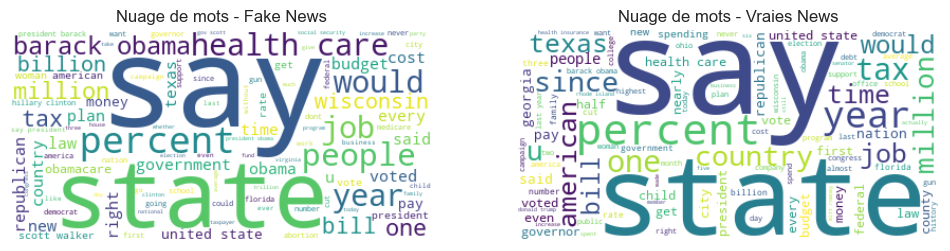

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Nuage de mots pour Fake News
fake_text = " ".join(fake_texts)
wordcloud_fake = WordCloud(stopwords='english', max_words=100, background_color='white').generate(fake_text)

# Nuage de mots pour Vraies News
true_text = " ".join(true_texts)
wordcloud_true = WordCloud(stopwords='english', max_words=100, background_color='white').generate(true_text)

# Affichage
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title("Nuage de mots - Fake News")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title("Nuage de mots - Vraies News")
plt.axis("off")

plt.show()
